## EDA

Making sure we are in the data1030 environment before proceeding.

In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.
[ OK ] shap version 0.40.0 is installed.


### Important Packages to Import

In [2]:
#important packages
import pandas as pd
import numpy as np
import scipy.stats as st 

#visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing and Checking Out Data

In [4]:
#reading in the dataset
df = pd.read_csv('../data/dci_2015_2019_dataset.csv')

In [5]:
#checking out the first few rows of the dataframe
pd.set_option('display.max_columns', 500)
df.head()

,Unnamed: 0,Zipcode,City,County,Metro Area,State,State Abbreviation,Census Region,Congressional District (Majority - 116th Congress),Urban/Suburban/Small Town/Rural Designation,Total Population,% of Adults w/o a High School Degree,Poverty Rate,% of Prime Age Adults Not in Work,Vacancy Rate,Median Income Ratio,% Change in Employment,% Change in Establishments,Distress Score,Non-Hispanic White % of Population,Hispanic or Latino Share % of Population,Black or African-American % of Population,American Indian or Alaska Native % of Population,Asian or Pacific Islander % of Population,Other Race or Two or More Races % of Population,% of the Population Foreign-Born,% of 25+ Population w/ a Bachelors Degree or Higher
0,0,1001,"Agawam Town city, MA","Hampden County, Massachusetts","Springfield, MA",Massachusetts,MA,Northeast,MA-01,Suburban,17312,0.076,0.085,0.148,0.028,1.076,-0.009,0.035,23.0,0.885,0.052,0.025,0.000,0.021,0.017,0.098,0.323
1,1,1002,NaN,"Franklin County, Massachusetts","Springfield, MA",Massachusetts,MA,Northeast,MA-02,Suburban,30014,0.042,0.260,0.186,0.092,1.029,-0.552,-0.049,66.6,0.709,0.075,0.053,0.002,0.115,0.046,0.183,0.664
2,2,1005,,"Worcester County, Massachusetts","Worcester, MA-CT",Massachusetts,MA,Northeast,MA-02,Rural,5128,0.046,0.086,0.182,0.083,0.917,0.145,-0.032,35.4,0.938,0.020,0.024,0.000,0.006,0.011,0.036,0.328
3,3,1007,,"Hampshire County, Massachusetts","Springfield, MA",Massachusetts,MA,Northeast,MA-02,Rural,15005,0.048,0.061,0.140,0.030,1.535,-0.038,0.009,13.5,0.919,0.014,0.006,0.000,0.044,0.017,0.061,0.486
4,4,1008,,"Hampden County, Massachusetts","Springfield, MA",Massachusetts,MA,Northeast,MA-01,Rural,1140,0.099,0.042,0.145,0.069,1.285,-0.023,0.111,19.6,0.961,0.027,0.000,0.004,0.000,0.008,0.034,0.344


In [6]:
#checking the shape of the data to return (rows, columns)
print('The shape of the dataset is: ', df.shape)

The shape of the dataset is:  (25766, 27)


In [7]:
#checking quick statistics of the continuous variables in the dataset
print('Quick statistics of the continuous variables:')
df.describe()

Quick statistics of the continuous variables:


,Unnamed: 0,Zipcode,Total Population,% of Adults w/o a High School Degree,Poverty Rate,% of Prime Age Adults Not in Work,Vacancy Rate,Median Income Ratio,% Change in Employment,% Change in Establishments,Distress Score,Non-Hispanic White % of Population,Hispanic or Latino Share % of Population,Black or African-American % of Population,American Indian or Alaska Native % of Population,Asian or Pacific Islander % of Population,Other Race or Two or More Races % of Population,% of the Population Foreign-Born,% of 25+ Population w/ a Bachelors Degree or Higher
count,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000,25766.000000
mean,12882.500000,48928.689319,12512.924164,0.119430,0.134455,0.230736,0.095627,0.982598,0.088580,0.036993,50.001595,0.749586,0.103625,0.084326,0.013279,0.026854,0.022322,0.070467,0.259306
std,7438.147854,27532.483451,15579.310779,0.083981,0.089427,0.110496,0.062491,0.333502,0.491424,0.171584,28.868042,0.251473,0.162519,0.158674,0.073895,0.061674,0.024193,0.096603,0.161111
min,0.000000,1001.000000,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.824000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6441.250000,27016.250000,1717.000000,0.060000,0.069000,0.158000,0.050000,0.772000,-0.054000,-0.041000,25.000000,0.630000,0.015000,0.002000,0.000000,0.000000,0.007000,0.011000,0.146000
50%,12882.500000,48218.500000,5262.500000,0.099000,0.115000,0.209000,0.082000,0.937000,0.045000,0.021000,50.000000,0.848000,0.041000,0.016000,0.001000,0.007000,0.017000,0.031000,0.212000
75%,19323.750000,71832.750000,18402.000000,0.158000,0.178000,0.279000,0.127000,1.140000,0.159000,0.094000,75.000000,0.943000,0.111000,0.082000,0.005000,0.024000,0.030000,0.088000,0.331000
max,25765.000000,99929.000000,128294.000000,0.803000,0.826000,1.000000,1.000000,3.833000,38.000000,4.000000,100.000000,1.000000,1.000000,1.000000,1.000000,0.794000,0.398000,0.769000,1.000000


In [8]:
#checking data types of features
print('Datatypes of features:')
print(df.dtypes)

Datatypes of features:
Unnamed: 0                                               int64
Zipcode                                                  int64
City                                                    object
County                                                  object
Metro Area                                              object
State                                                   object
State Abbreviation                                      object
Census Region                                           object
Congressional District (Majority - 116th Congress)      object
Urban/Suburban/Small Town/Rural Designation             object
Total Population                                         int64
% of Adults w/o a High School Degree                   float64
Poverty Rate                                           float64
% of Prime Age Adults Not in Work                      float64
Vacancy Rate                                           float64
Median Income Ratio             

In [9]:
#returning a count of how many missing values are in each feature
df.isna().sum()

Unnamed: 0                                                 0
Zipcode                                                    0
City                                                    1388
County                                                     0
Metro Area                                             10748
State                                                      0
State Abbreviation                                         0
Census Region                                              0
Congressional District (Majority - 116th Congress)         0
Urban/Suburban/Small Town/Rural Designation                0
Total Population                                           0
% of Adults w/o a High School Degree                       0
Poverty Rate                                               0
% of Prime Age Adults Not in Work                          0
Vacancy Rate                                               0
Median Income Ratio                                        0
% Change in Employment  

### Data Cleaning

Since there are so many missing values for City and Metro and there are already numerous location features in the dataset, I am going to remove these columns. We have the State data so I am comfortable deleting the City and Metro categories. I will also remove the 'Unnamed:0' column and the Zipcode column since both of these act as an index and we already have an index. 

In [8]:
#we dont need the geographic features city and metro area and we will split
#county and leave the state abbreviation as the new feature for state
df = df.drop(columns = ['City', 'Metro Area', 'State', 'Unnamed: 0', 'Zipcode'])

In [9]:
#splitting county on the comma that separates county and state
#this isnt really necessary because i drop this column before running the model
df[['county', 'drop']] = df['County'].str.split(',', 1, expand = True)
df = df.drop(columns = ['County', 'drop'])

I want to rename some of the features so they are easier to read and work with.

In [10]:
#renaming columns to clean up a bit
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [11]:
#renaming features
df = df.rename(columns={
    'state_abbreviation': 'state', \
    'congressional_district_(majority_-_116th_congress)': 'congressional_district', \
    'urban/suburban/small_town/rural_designation': 'community_class', \
    '%_of_adults_w/o_a_high_school_degree': '%_adults_wo_hs', \
    '%_of_prime_age_adults_not_in_work': '%_adults_not_employed', \
    'non-hispanic_white_%_of_population': '%_pop_non_hispanic_white', \
    'hispanic_or_latino_share_%_of_population': '%_pop_hispanic_or_latino', \
    'black_or_african-american_%_of_population': '%_pop_black_or_african_american', \
    'american_indian_or_alaska_native_%_of_population': '%_pop_american_indian_or_alaska_native', \
    'asian_or_pacific_islander_%_of_population': '%_pop_asian_or_pacific_islander', \
    'other_race_or_two_or_more_races_%_of_population': '%_pop_other_race', \
    '%_of_the_population_foreign-born': '%_pop_foreign_born', \
    '%_of_25+_population_w/_a_bachelors_degree_or_higher': '%_pop_bachelors_degree_or_higher'
                    }
                 )

### Visualizing the Target Variable: Distress Score

In [12]:
#looking at value counts
df['distress_score'].value_counts()

75.1     28
79.2     28
69.6     28
94.5     28
63.8     28
         ..
20.9     24
77.8     24
69.7     23
100.0    13
0.0      12
Name: distress_score, Length: 1001, dtype: int64

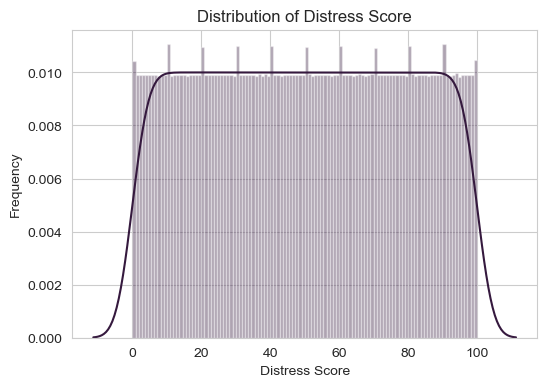

In [13]:
#checking the distribution of our target variable - uniform distribution
sns.reset_defaults()
sns.set_style('whitegrid')
sns.set_palette('rocket')

#taking random variables from uniform distribution
data = df['distress_score']

#plotting the uniform data
plt.figure(figsize=(6,4))
ax = sns.distplot(data,
                  bins = 110,#int(np.sqrt(zip.shape[0])),
                )
ax.set(xlabel = 'Distress Score',ylabel = 'Frequency', title = 'Distribution of Distress Score')
# plt.savefig('../figures/target_distribution.png', bbox_inches='tight')
plt.show()

We can see that our target has a uniform distribution. Now I want to turn the target into categorical quintile scores so we can visualize the target variable as both a categorical and continuous feature. I'll use this strictly for EDA purposes and delete before running any models since this will be perfectly (or almost perfectly) correlated with out target variable.

In [15]:
#partitioning the target into 5 groups
df['distress_quintile'] = pd.qcut(df['distress_score'], 5, labels=[1,2,3,4,5])

In [16]:
#checking the distribution of the target over the quintiles
df['distress_quintile'].value_counts()

1    5166
2    5153
3    5153
4    5153
5    5141
Name: distress_quintile, dtype: int64

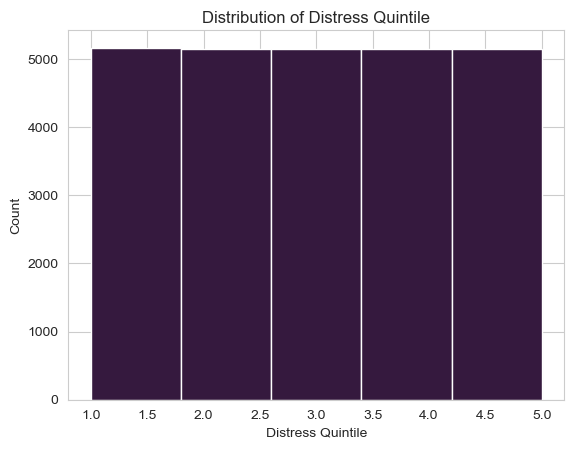

In [17]:
#visualizing the distribution of the categorical quintiles
plt.hist(df['distress_quintile'], orientation = 'vertical',histtype = 'bar', bins=5)
plt.xlabel('Distress Quintile')
plt.ylabel('Count')
plt.title('Distribution of Distress Quintile')
# plt.savefig('../figures/target_as_category_distribution.png', bbox_inches='tight')
plt.show()

### Visualizing the Target Variable with other Features

In [19]:
#checking out which columns we have to work with
df.columns

Index(['state', 'census_region', 'congressional_district', 'community_class',
       'total_population', '%_adults_wo_hs', 'poverty_rate',
       '%_adults_not_employed', 'vacancy_rate', 'median_income_ratio',
       '%_change_in_employment', '%_change_in_establishments',
       'distress_score', '%_pop_non_hispanic_white',
       '%_pop_hispanic_or_latino', '%_pop_black_or_african_american',
       '%_pop_american_indian_or_alaska_native',
       '%_pop_asian_or_pacific_islander', '%_pop_other_race',
       '%_pop_foreign_born', '%_pop_bachelors_degree_or_higher', 'county',
       'distress_quintile'],
      dtype='object')

In [18]:
# #more location features that we don't need
df = df.drop(columns = ['county', 'congressional_district'])

In [19]:
#making the new quintile var we made a category
df['distress_quintile'].astype('object')

0        2
1        4
2        2
3        1
4        1
        ..
25761    5
25762    4
25763    4
25764    5
25765    4
Name: distress_quintile, Length: 25766, dtype: object

In [20]:
#collecting the categorical and numeric features in their own lists
categorical_ftrs = []
numeric_ftrs = []

for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        categorical_ftrs.append(i)
    else:
        numeric_ftrs.append(i)

In [21]:
print('Categorical features:', categorical_ftrs)
print('\n')
print('Numeric features:', numeric_ftrs)

Categorical features: ['state', 'census_region', 'community_class', 'distress_quintile']


Numeric features: ['total_population', '%_adults_wo_hs', 'poverty_rate', '%_adults_not_employed', 'vacancy_rate', 'median_income_ratio', '%_change_in_employment', '%_change_in_establishments', 'distress_score', '%_pop_non_hispanic_white', '%_pop_hispanic_or_latino', '%_pop_black_or_african_american', '%_pop_american_indian_or_alaska_native', '%_pop_asian_or_pacific_islander', '%_pop_other_race', '%_pop_foreign_born', '%_pop_bachelors_degree_or_higher']


In [22]:
#getting dummy vars so we can include in the correlation heatmap
df_new = df
#don't want to include state here or we won't be able to read out matrix
#also don't want to include distress_quintile because we generated it from the target
cat_ftrs = categorical_ftrs[1:3]

for i in df[cat_ftrs]:
    df_dummies = pd.get_dummies(df[i])
    df_new = pd.concat([df_new, df_dummies], axis=1)

In [23]:
df_new

,state,census_region,community_class,total_population,%_adults_wo_hs,poverty_rate,%_adults_not_employed,vacancy_rate,median_income_ratio,%_change_in_employment,%_change_in_establishments,distress_score,%_pop_non_hispanic_white,%_pop_hispanic_or_latino,%_pop_black_or_african_american,%_pop_american_indian_or_alaska_native,%_pop_asian_or_pacific_islander,%_pop_other_race,%_pop_foreign_born,%_pop_bachelors_degree_or_higher,distress_quintile,Midwest,Northeast,South,West,Rural,Small Town,Suburban,Urban
0,MA,Northeast,Suburban,17312,0.076,0.085,0.148,0.028,1.076,-0.009,0.035,23.0,0.885,0.052,0.025,0.000,0.021,0.017,0.098,0.323,2,0,1,0,0,0,0,1,0
1,MA,Northeast,Suburban,30014,0.042,0.260,0.186,0.092,1.029,-0.552,-0.049,66.6,0.709,0.075,0.053,0.002,0.115,0.046,0.183,0.664,4,0,1,0,0,0,0,1,0
2,MA,Northeast,Rural,5128,0.046,0.086,0.182,0.083,0.917,0.145,-0.032,35.4,0.938,0.020,0.024,0.000,0.006,0.011,0.036,0.328,2,0,1,0,0,1,0,0,0
3,MA,Northeast,Rural,15005,0.048,0.061,0.140,0.030,1.535,-0.038,0.009,13.5,0.919,0.014,0.006,0.000,0.044,0.017,0.061,0.486,1,0,1,0,0,1,0,0,0
4,MA,Northeast,Rural,1140,0.099,0.042,0.145,0.069,1.285,-0.023,0.111,19.6,0.961,0.027,0.000,0.004,0.000,0.008,0.034,0.344,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25761,AK,West,Rural,605,0.091,0.108,0.448,0.141,0.618,-0.066,-0.053,87.8,0.866,0.041,0.000,0.048,0.015,0.030,0.038,0.240,5,0,0,0,1,1,0,0,0
25762,AK,West,Rural,1976,0.092,0.194,0.237,0.117,0.672,-0.015,0.085,72.4,0.663,0.043,0.007,0.149,0.015,0.124,0.029,0.245,4,0,0,0,1,1,0,0,0
25763,AK,West,Rural,908,0.096,0.174,0.307,0.134,0.810,0.117,0.125,63.4,0.486,0.036,0.007,0.335,0.014,0.122,0.028,0.176,4,0,0,0,1,1,0,0,0
25764,AK,West,Rural,1654,0.080,0.151,0.393,0.098,0.724,-0.102,0.000,81.0,0.130,0.059,0.000,0.722,0.024,0.065,0.039,0.104,5,0,0,0,1,1,0,0,0


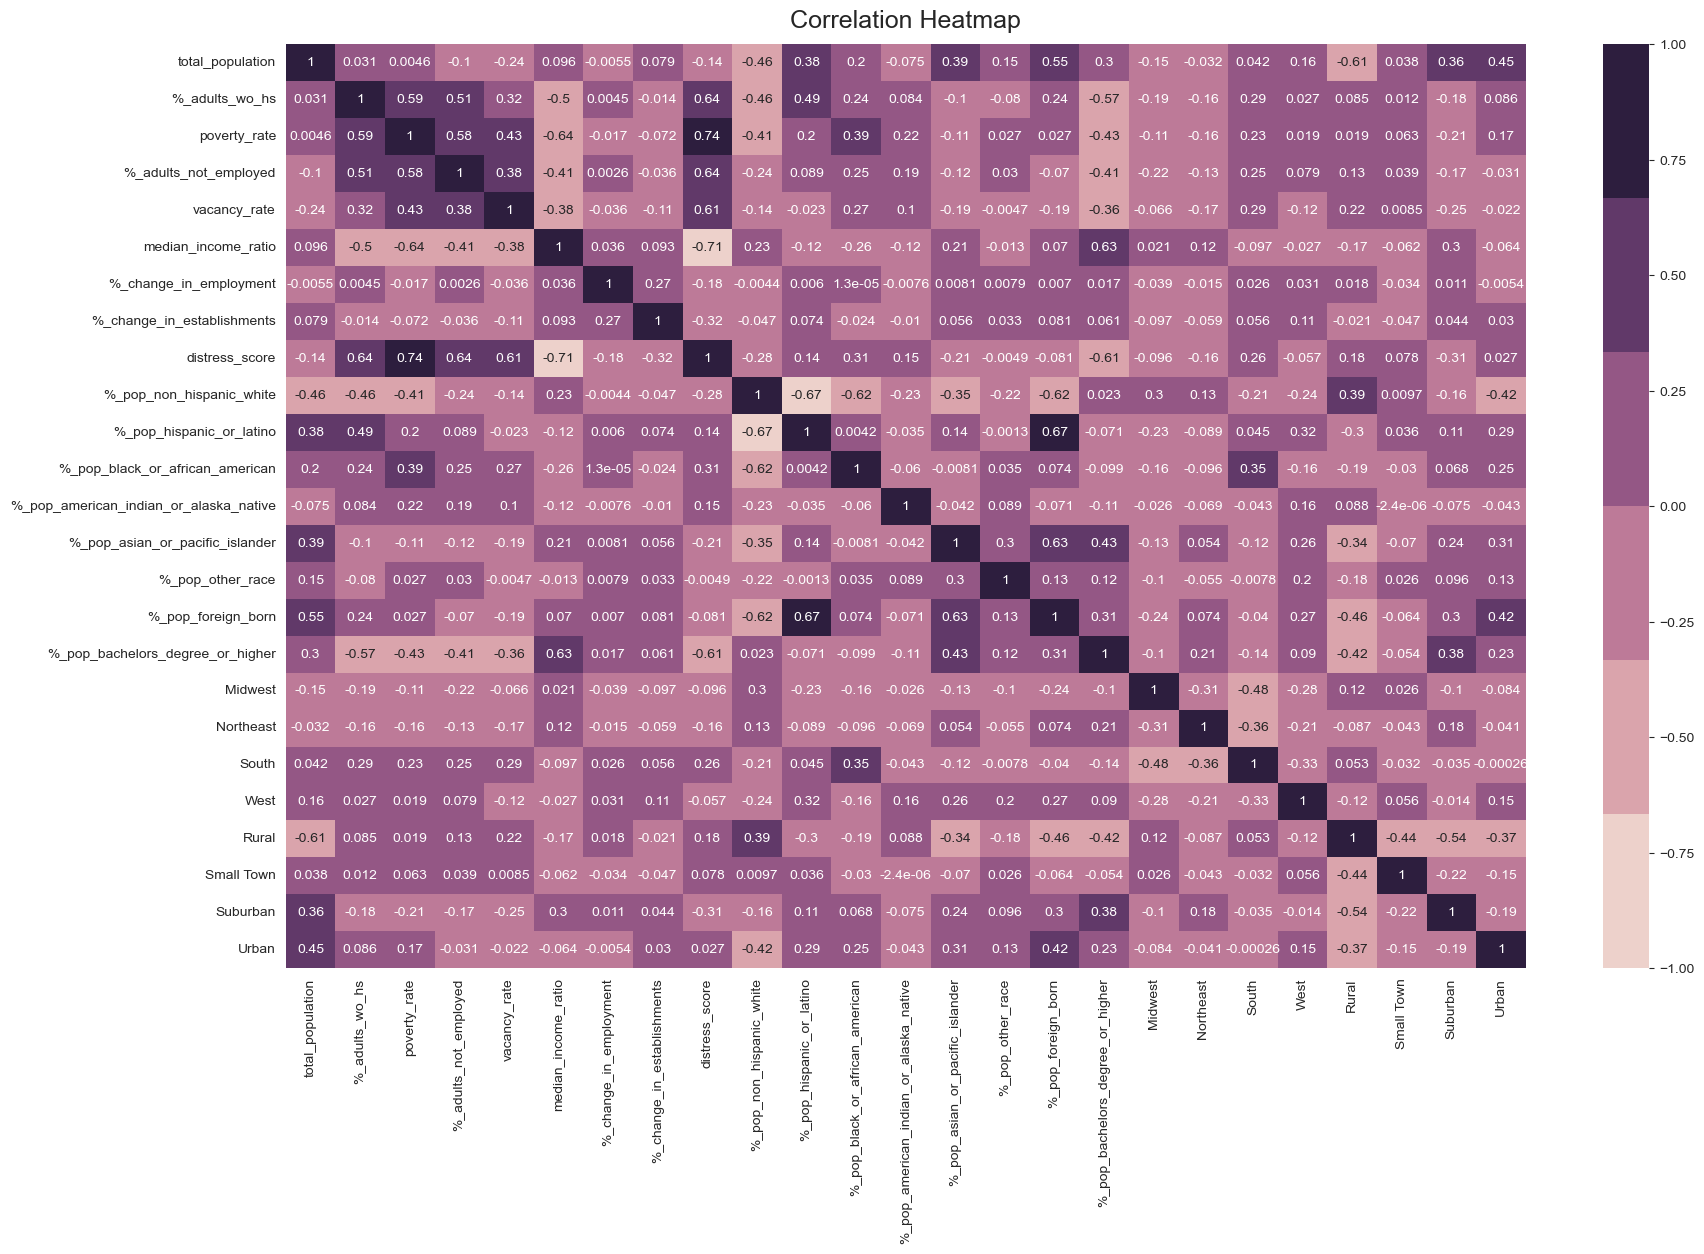

In [25]:
#checking out the correlation between all features
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.cubehelix_palette())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
# plt.savefig('../figures/heatmap.png', bbox_inches='tight')
plt.show()

In [26]:
#numerically returning the greatest feature correlations to distress score
correlation = df_new.corr().abs().unstack()
correlation = correlation['distress_score']
correlation = correlation.sort_values(ascending=False)

#I know that 'Distress Score' will have perfect correlation so I want to skip 
#this and get the features with the highest correlation to the target
print(correlation.iloc[1:10])

poverty_rate                        0.744688
median_income_ratio                 0.714149
%_adults_wo_hs                      0.642539
%_adults_not_employed               0.637225
vacancy_rate                        0.614598
%_pop_bachelors_degree_or_higher    0.614017
%_change_in_establishments          0.321733
Suburban                            0.310486
%_pop_black_or_african_american     0.307088
dtype: float64


From above, we can see that the 3 features with the highest correlation to our target variable are poverty_rate, median_income_ratio, and %\_adults_wo_hs which are all continuous features.

Let's visualize the top correlated features with our target.

#### Target vs Poverty Rate

<Figure size 600x400 with 0 Axes>

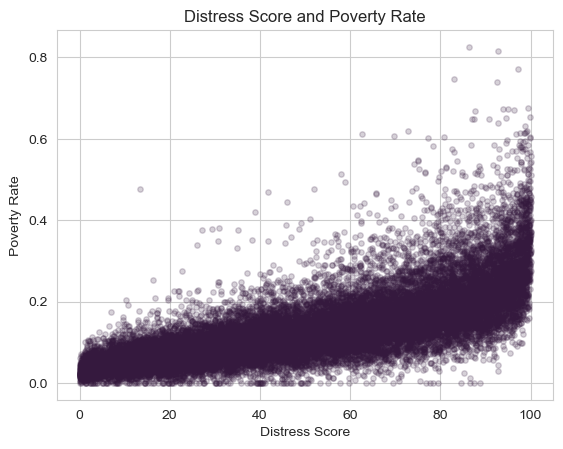

In [27]:
#scatterplot to visualize relationship between distress score and poverty rate
plt.figure(figsize=(6,4))
df.plot.scatter('distress_score','poverty_rate',s=15,alpha=0.2, title='Distress Score and Poverty Rate')
plt.xlabel('Distress Score')
plt.ylabel('Poverty Rate')
# plt.savefig('../figures/target_vs_poverty_rate.png', bbox_inches='tight')
plt.show()

#### Target vs Median Income Ratio

<Figure size 2000x400 with 0 Axes>

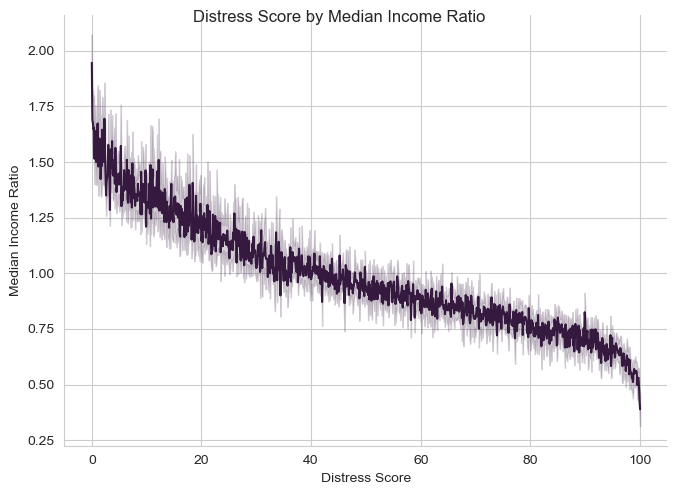

In [28]:
#visualizing distress score and median income ratio
plt.figure(figsize=(20, 4))
sns.relplot(data=df, x="distress_score", y="median_income_ratio", kind="line", aspect=11/8)
plt.ylabel('Median Income Ratio')
plt.xlabel('Distress Score')
plt.suptitle('Distress Score by Median Income Ratio')
# plt.savefig('../figures/target_vs_median_income.png', bbox_inches='tight')
plt.show()

#### Target vs Percent Adults w/o High School Degree

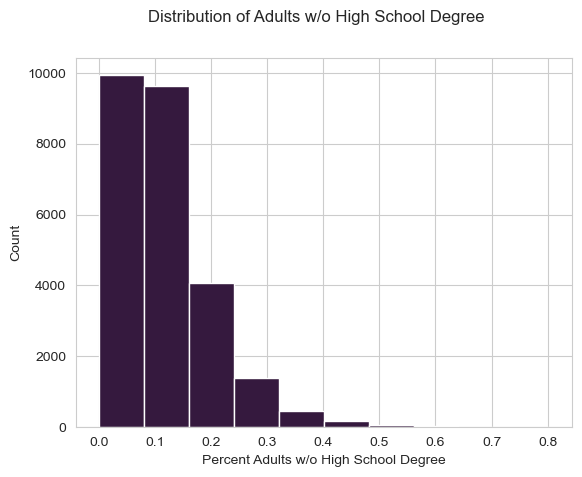

In [29]:
#checking distribution of adults wo high school
plt.hist(df['%_adults_wo_hs'])
plt.ylabel('Count')
plt.xlabel('Percent Adults w/o High School Degree')
plt.suptitle('Distribution of Adults w/o High School Degree')
# plt.savefig('../figures/target_vs_high_school_degree.png', bbox_inches='tight')
plt.show()

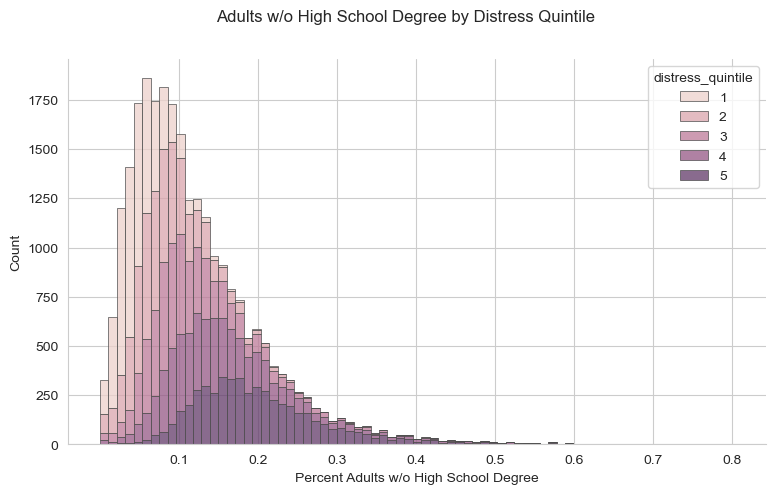

In [30]:
#distress score (as quintile categories) vs adult w/o high school -- stacked bar plot
f, ax = plt.subplots(figsize=(9, 5))
sns.despine(f)

sns.histplot(
    df,
    x="%_adults_wo_hs", hue="distress_quintile",
    multiple="stack",
    palette=sns.cubehelix_palette(),
    edgecolor=".3",
    linewidth=.5,
    bins=75,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.ylabel('Count')
plt.xlabel('Percent Adults w/o High School Degree')
plt.suptitle('Adults w/o High School Degree by Distress Quintile')
# plt.savefig('../figures/quintile_target_vs_degree.png', bbox_inches='tight')
plt.show()

In [34]:
#dropping the distress_quintile var we created
df = df.drop(columns = ['distress_quintile'])

In [35]:
%store df

Stored 'df' (DataFrame)
